## Titanic: Machine Learning from Disaster

Original Kaggle Competition Link: https://www.kaggle.com/c/titanic/overview

### 1. Problem Definition

Predict passenger survival (0=No, 1=Yes) based on passenger data

### 2. Data

Independent variables - passenger data
Dependent variables - whether or not the passenger survived

### 3. Evaluation

Percentage of passengers correctly predicted - Accuracy. 

### 4. Features

1. survival - Survival	(0 = No, 1 = Yes)
2. pclass - Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)
3. sex - Sex	
4. Age - Age in years	
5. sibsp - # of siblings / spouses aboard the Titanic	
6. parch - # of parents / children aboard the Titanic	
7. ticket - Ticket number	
8. fare - Passenger fare	
9. cabin - Cabin number	
10. embarked - Port of Embarkation	(C = Cherbourg, Q = Queenstown, S = Southampton)


In [1002]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [1003]:
## Import tools

# Regular EDA and plotting libraries
import numpy as np # np is short for numpy
import pandas as pd # pandas is so commonly used, it's shortened to pd
import matplotlib.pyplot as plt
import seaborn as sns # seaborn gets shortened to sns

# We want our plots to appear in the notebook
%matplotlib inline 

## Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

## Model evaluators
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

In [1004]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")
df_train.shape, df_test.shape

((891, 12), (418, 11))

In [1005]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [1006]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


## Obervations/Issues to Resolve:
    
Will take a look at these issues in the Feature Engineering section. 
    
1. `Age`, `Cabin`, `Embarked` all have missing values. 
2. `Name`, `Sex`, `Ticket`, `Cabin`, `Embarked` are all objects. Convert to numeric. 

# Exploratory Data Analysis (EDA)

Take a look at each of the variables with relation to the target variable, `Survived`

1. Sex
2. Age
3. SibSp
4. Parch
5. Fare
6. Embarked
7. Pclass

In [1007]:
df_train["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

## Sex vs. Survived

(array([0, 1]), <a list of 2 Text xticklabel objects>)

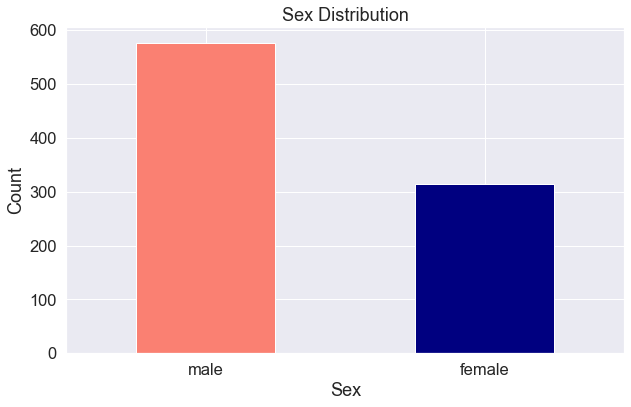

In [1008]:
df_train.Sex.value_counts().plot(kind="bar", figsize=(10,6), color=["salmon", "navy"])

plt.title("Sex Distribution")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.xticks(rotation=0)

In [1009]:
df_train["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

(array([0, 1]), <a list of 2 Text xticklabel objects>)

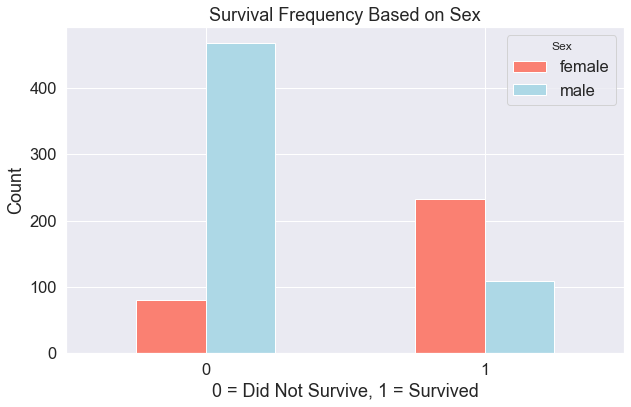

In [1010]:
pd.crosstab(df_train.Survived, df_train.Sex).plot(kind="bar", figsize=(10,6), color=["salmon", "lightblue"])

plt.title("Survival Frequency Based on Sex")
plt.xlabel("0 = Did Not Survive, 1 = Survived")
plt.ylabel("Count")
plt.xticks(rotation=0)

In [1011]:

male_count = df_train.Sex[df_train.Sex == "male"].value_counts()
male_survived = df_train.Sex[df_train.Survived==1][df_train.Sex == "male"].value_counts()
male_not_survived = df_train.Sex[df_train.Survived==0][df_train.Sex == "male"].value_counts()

female_count = df_train.Sex[df_train.Sex == "female"].value_counts()
female_survived = df_train.Sex[df_train.Survived==1][df_train.Sex == "female"].value_counts()
female_not_survived = df_train.Sex[df_train.Survived==0][df_train.Sex == "female"].value_counts()


print((male_not_survived/male_count)*100)
print((female_not_survived/female_count)*100)

male    81.109185
Name: Sex, dtype: float64
female    25.796178
Name: Sex, dtype: float64


**OBSERVATION:**
    
About 80% of males did not survive. 
About 25% of females did not survive. 

1. Nearly twice as many males as females
2. Male death rate is significantly higher

## Age vs Survived

Text(0.5, 0, 'Age')

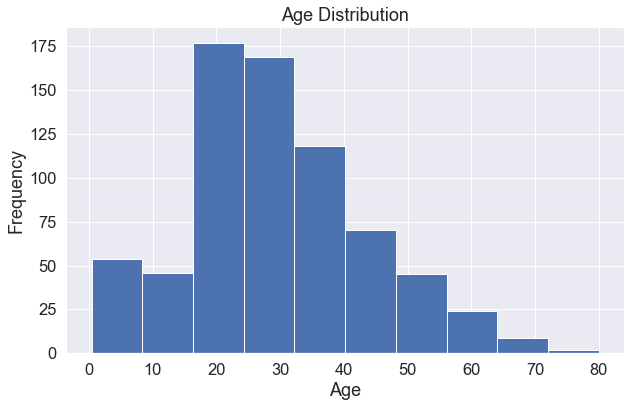

In [1012]:
df_train["Age"].plot(kind="hist", figsize=(10,6))
plt.title("Age Distribution");

plt.xlabel("Age")

In [1013]:
df_train["Age"].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [1014]:
df_train.Survived[df_train.Survived == 1].value_counts()

1    342
Name: Survived, dtype: int64

/Users/harjotsidhu/Documents/MLPractice/Titanic/env/lib/python3.8/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/harjotsidhu/Documents/MLPractice/Titanic/env/lib/python3.8/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0.5, 1.0, 'Age Distribution for Non-Survival')

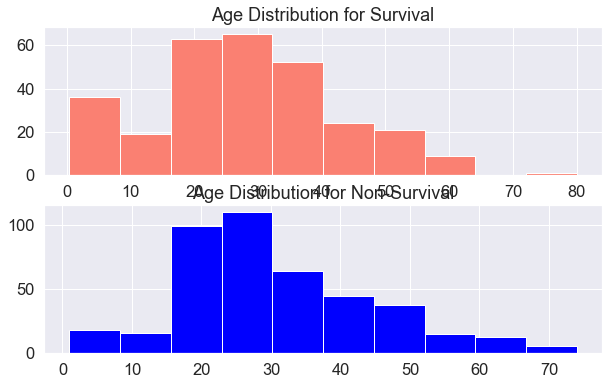

In [1015]:
# Create another figure
figure, ax = plt.subplots(2, figsize=(10,6))

# Start with positve examples

ax[0].hist(df_train.Age[df_train.Survived == 1] , color="salmon") 
ax[0].set_title("Age Distribution for Survival")


# Now for negative examples, we want them on the same plot, so we call plt again
ax[1].hist(df_train.Age[df_train.Survived == 0] , color="blue")
ax[1].set_title("Age Distribution for Non-Survival")



# Add some helpful info
#plt.title("Heart Disease in function of Age and Max Heart Rate")
#plt.xlabel("Age")
#plt.legend(["Disease", "No Disease"])
#plt.ylabel("Max Heart Rate");

In [1016]:
df_train.Age[df_train.Survived == 1].describe()

count    290.000000
mean      28.343690
std       14.950952
min        0.420000
25%       19.000000
50%       28.000000
75%       36.000000
max       80.000000
Name: Age, dtype: float64

In [1017]:
df_train.Age[df_train.Survived == 0].describe()

count    424.000000
mean      30.626179
std       14.172110
min        1.000000
25%       21.000000
50%       28.000000
75%       39.000000
max       74.000000
Name: Age, dtype: float64

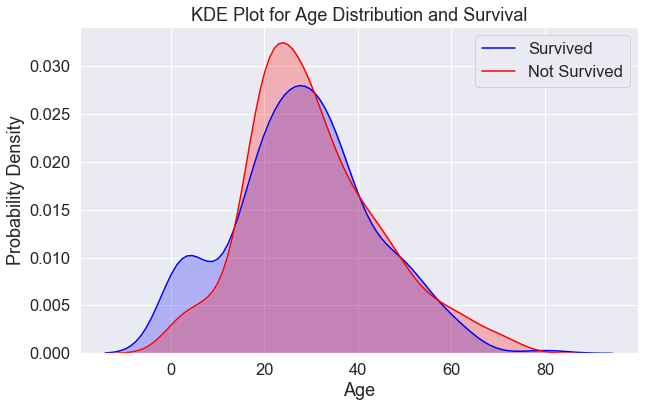

In [1018]:
fig, ax = plt.subplots(figsize=(10,6))

sns.kdeplot(df_train.Age[df_train.Survived==1], kernel='gau', ax=ax, color='Blue', shade=True)
sns.kdeplot(df_train.Age[df_train.Survived==0], kernel='gau', ax=ax, color='Red', shade=True)

ax.set_xlabel("Age")
ax.set_ylabel("Probability Density")
ax.set_title("KDE Plot for Age Distribution and Survival")
ax.legend(["Survived", "Not Survived"])

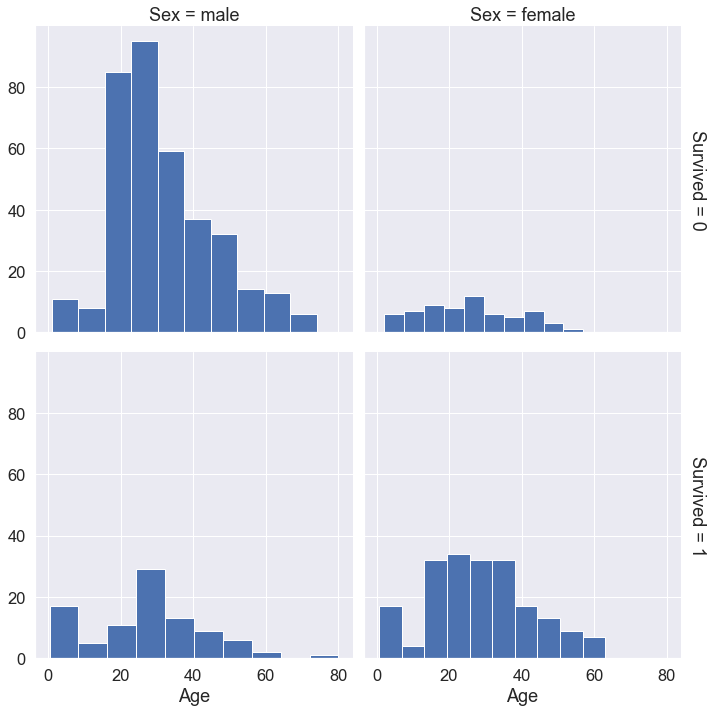

In [1019]:
grid = sns.FacetGrid(df_train, height=5, row="Survived", col="Sex", palette='gray', margin_titles=True)
grid.map(plt.hist, "Age")

## SibSp vs Survived

In [1020]:
df_train["SibSp"].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

Text(0.5, 0, '# of Sibling/Spouses')

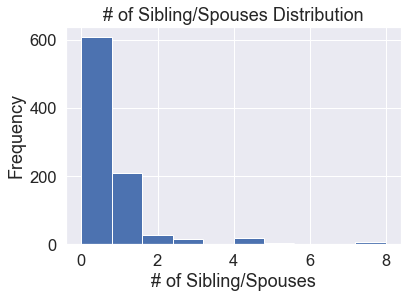

In [1021]:
df_train["SibSp"].plot(kind="hist")
plt.title("# of Sibling/Spouses Distribution")
plt.xlabel("# of Sibling/Spouses")

Text(0.5, 1.0, 'SipSp and Surival Rate')

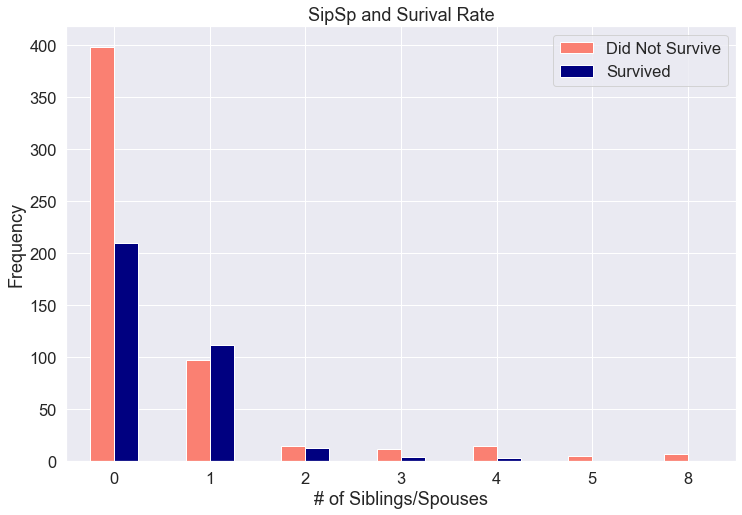

In [1022]:
pd.crosstab(df_train.SibSp, df_train.Survived).plot(kind="bar", figsize=(12,8), color=["salmon", "navy"])
plt.xlabel("# of Siblings/Spouses")
plt.xticks(rotation=0)
plt.ylabel("Frequency")
plt.legend(["Did Not Survive", "Survived"]);
plt.title("SipSp and Surival Rate")

Text(0.5, 1.0, 'Survival Rate based on SibSp')

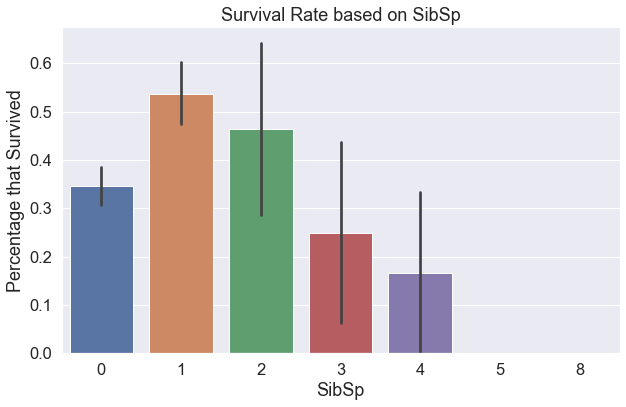

In [1023]:
fig, ax = plt.subplots(figsize=(10,6))

sns.barplot(data=df_train, x="SibSp", y="Survived", estimator=np.mean, ax=ax)
ax.set_ylabel("Percentage that Survived")
ax.set_xlabel("SibSp")
ax.set_title("Survival Rate based on SibSp")

**OBSERVATION:** 
    
Generally, the more the Siblings/Spouses, the lower the survival rate.

## Parch vs Survived

Text(0.5, 0, '# of Parents/Children')

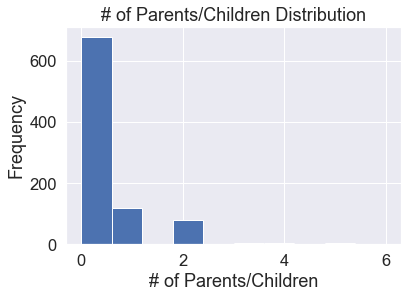

In [1024]:
df_train["Parch"].plot(kind="hist")
plt.title("# of Parents/Children Distribution")
plt.xlabel("# of Parents/Children")

Text(0.5, 1.0, 'Parch and Surival Rate')

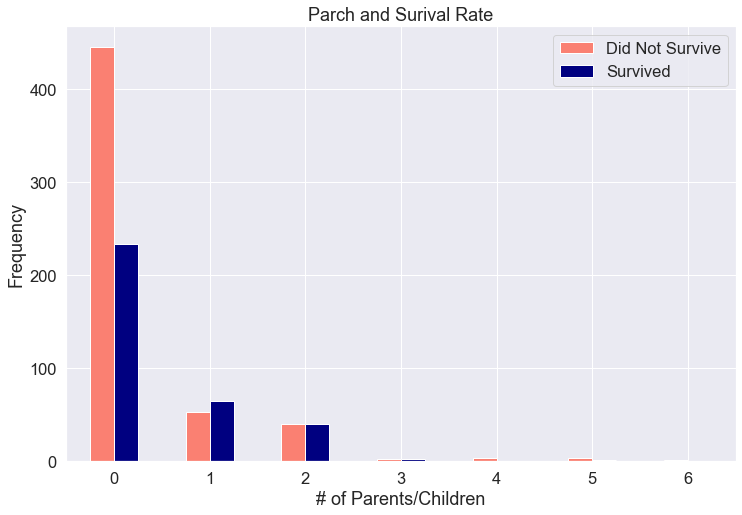

In [1025]:
pd.crosstab(df_train.Parch, df_train.Survived).plot(kind="bar", figsize=(12,8), color=["salmon", "navy"])
plt.xlabel("# of Parents/Children")
plt.xticks(rotation=0)
plt.ylabel("Frequency")
plt.legend(["Did Not Survive", "Survived"]);
plt.title("Parch and Surival Rate")

Text(0.5, 1.0, 'Survival Rate based on Parch')

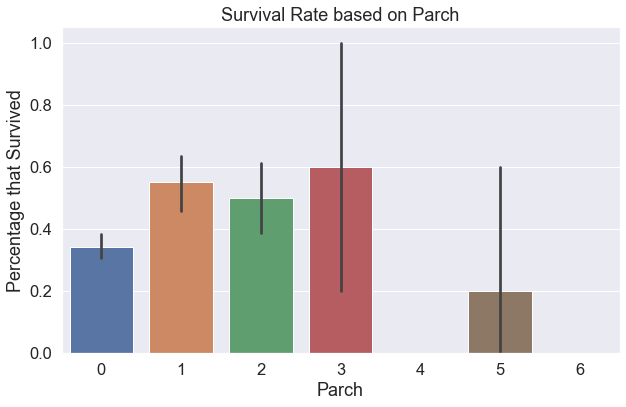

In [1026]:
fig, ax = plt.subplots(figsize=(10,6))

sns.barplot(data=df_train, x="Parch", y="Survived", estimator=np.mean, ax=ax)
ax.set_ylabel("Percentage that Survived")
ax.set_xlabel("Parch")
ax.set_title("Survival Rate based on Parch")

## Fare vs Survived

In [1027]:
len(df_train["Fare"].unique())

248

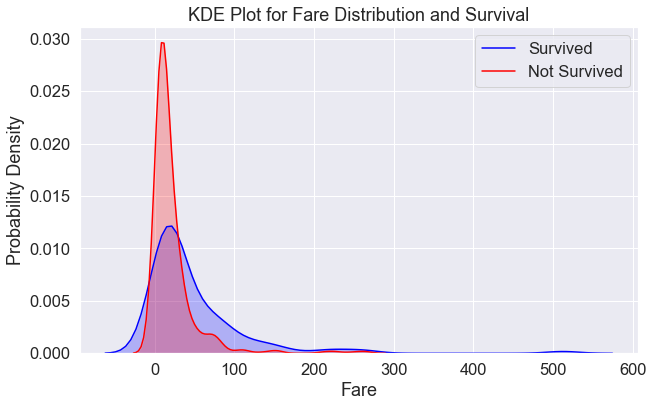

In [1028]:
fig, ax = plt.subplots(figsize=(10,6))

sns.kdeplot(df_train.Fare[df_train.Survived==1], kernel='gau', ax=ax, color='Blue', shade=True)
sns.kdeplot(df_train.Fare[df_train.Survived==0], kernel='gau', ax=ax, color='Red', shade=True)

ax.set_xlabel("Fare")
ax.set_ylabel("Probability Density")
ax.set_title("KDE Plot for Fare Distribution and Survival")
ax.legend(["Survived", "Not Survived"])

**OBSERVATION:**
    
Fare does not seem to have a high correlation with survival rate. However, we can see that a higher fare (atleast until around 200), seems to have a noticeable increase in survival. Perhaps this is due to a higher fare resultling in a higher passenger class? (Will test with Pclass variable). 

## Embarked vs Survived

Text(0.5, 1.0, 'Survival Rate based on Embarked')

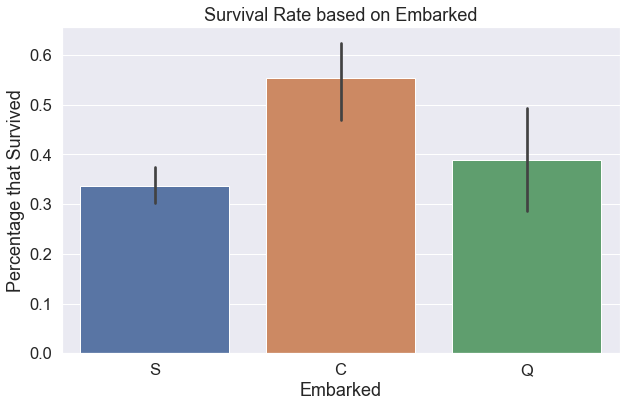

In [1029]:
fig, ax = plt.subplots(figsize=(10,6))

sns.barplot(data=df_train, x="Embarked", y="Survived", estimator=np.mean, ax=ax)
ax.set_ylabel("Percentage that Survived")
ax.set_xlabel("Embarked")
ax.set_title("Survival Rate based on Embarked")

Text(0.5, 1.0, 'Embarked and Surival Rate')

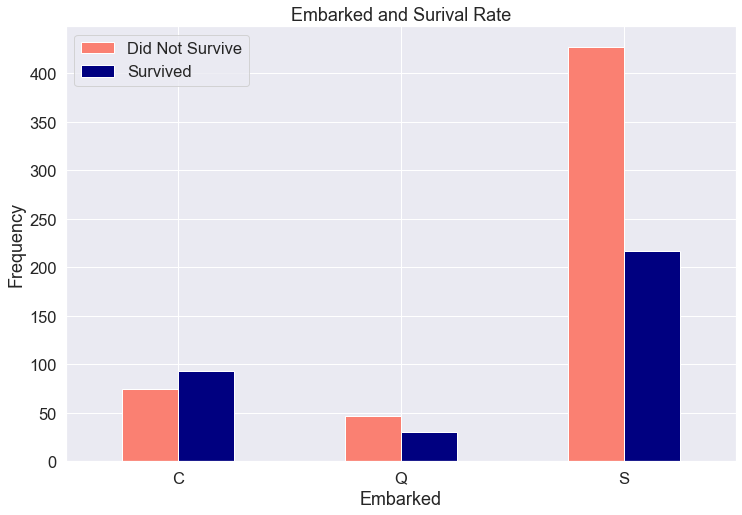

In [1030]:
pd.crosstab(df_train.Embarked, df_train.Survived).plot(kind="bar", figsize=(12,8), color=["salmon", "navy"])
plt.xlabel("Embarked")
plt.xticks(rotation=0)
plt.ylabel("Frequency")
plt.legend(["Did Not Survive", "Survived"]);
plt.title("Embarked and Surival Rate")

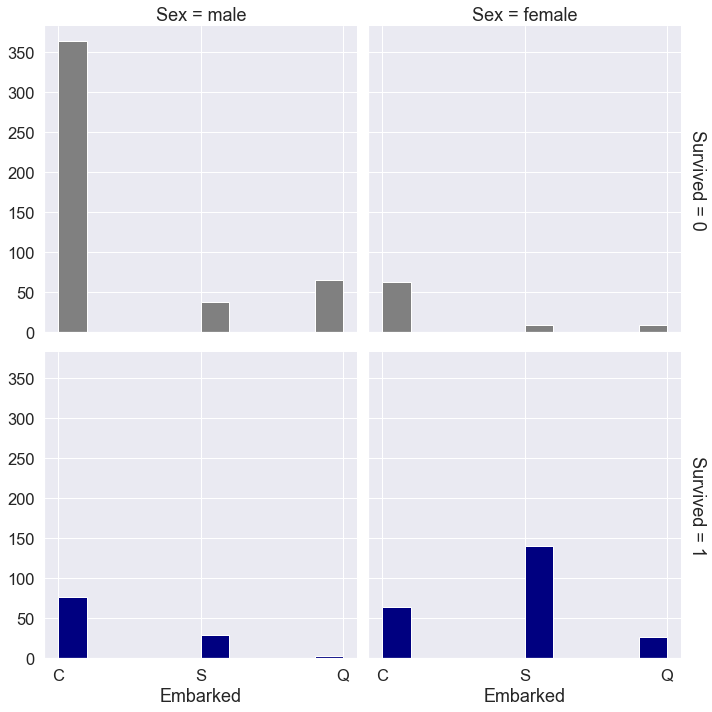

In [1031]:
pal = {0: 'gray', 1: 'navy'}
grid = sns.FacetGrid(df_train, height=5, row="Survived", col="Sex", margin_titles=True, palette=pal, hue="Survived")
grid.map(plt.hist, "Embarked")

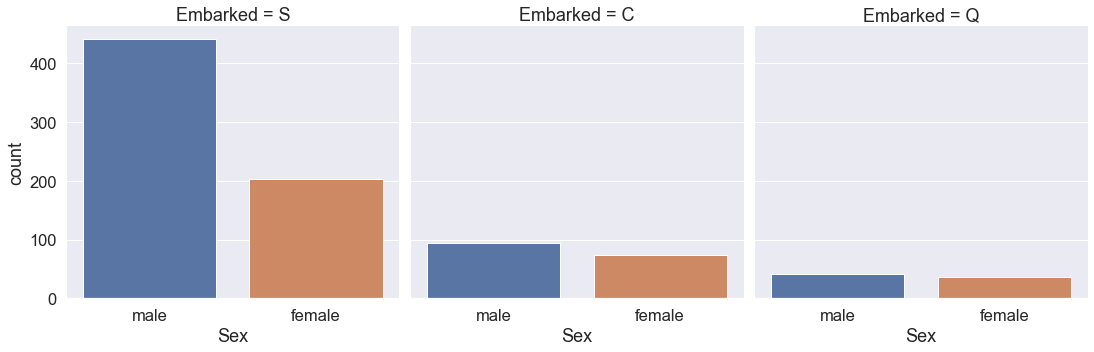

In [1032]:
sns.catplot(x="Sex", col="Embarked", data=df_train, kind="count")

**OBSERVATION:**
    
Port "C" has the highest survival rate overall.
Port "S" has the highest survival rate for females.

## Pclass vs Survived

In [1033]:
df_train["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

Text(0.5, 1.0, 'Survival Rate based on Pclass')

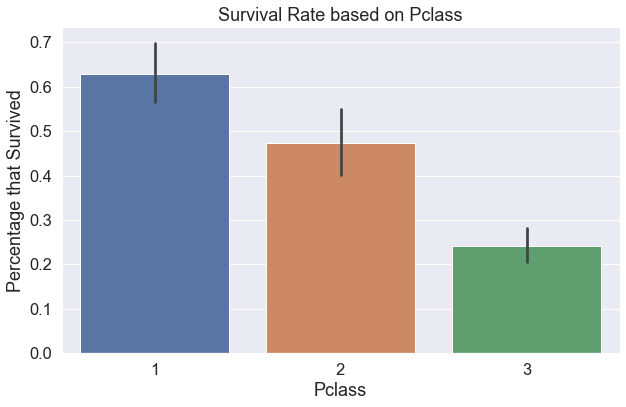

In [1034]:
fig, ax = plt.subplots(figsize=(10,6))

sns.barplot(data=df_train, x="Pclass", y="Survived", estimator=np.mean, ax=ax)
ax.set_ylabel("Percentage that Survived")
ax.set_xlabel("Pclass")
ax.set_title("Survival Rate based on Pclass")

Text(0.5, 0.98, 'Survival Percentage Based on Pclass and Sex')

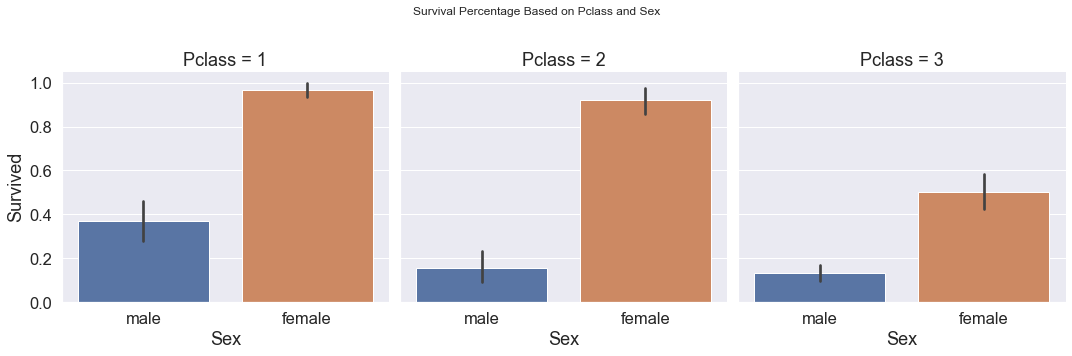

In [1035]:
grid = sns.catplot(x="Sex", y="Survived", col="Pclass", data=df_train, kind="bar")
plt.subplots_adjust(top=0.8)
grid.fig.suptitle("Survival Percentage Based on Pclass and Sex")

Text(0.5, 0.98, 'Sex Count by Pclass')

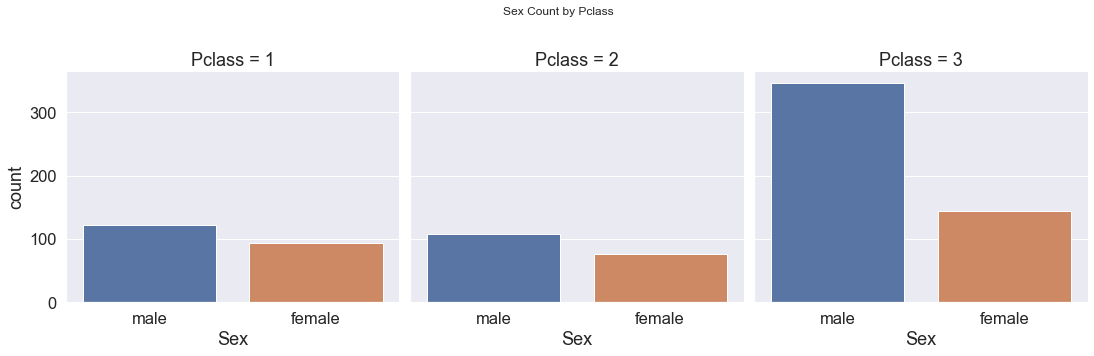

In [1036]:
grid = sns.catplot(x="Sex", col="Pclass", data=df_train, kind="count")
plt.subplots_adjust(top=0.8)
grid.fig.suptitle("Sex Count by Pclass")

**OBSERVATION:**
    
Higher classes have a higher survival rate. Females have the highest survival rates in class 1 and 2. Lower male survival rate may be due to the fact that a high amount of males are concentrated in class 3. 

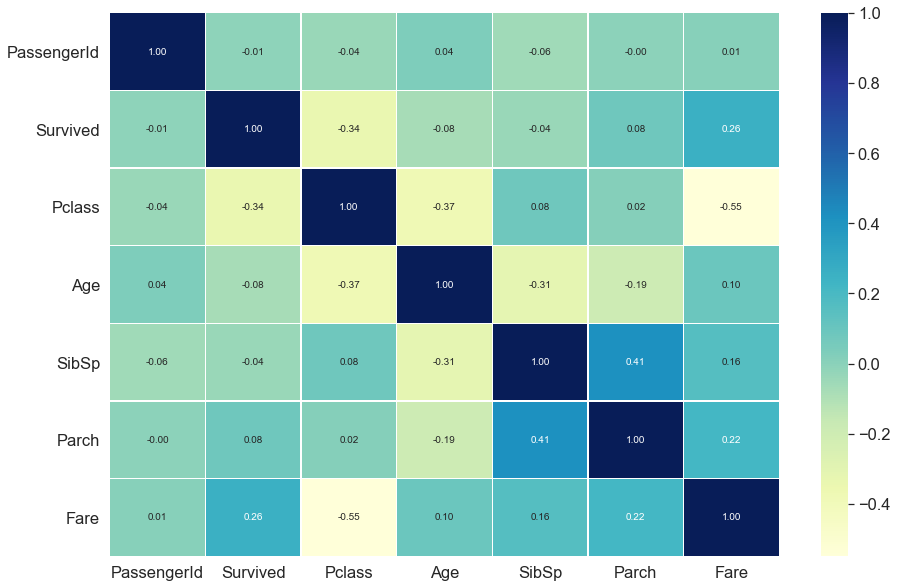

In [1037]:
corr_matrix = df_train.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, 
            annot=True, 
            linewidths=0.5, 
            fmt= ".2f", 
            cmap="YlGnBu");

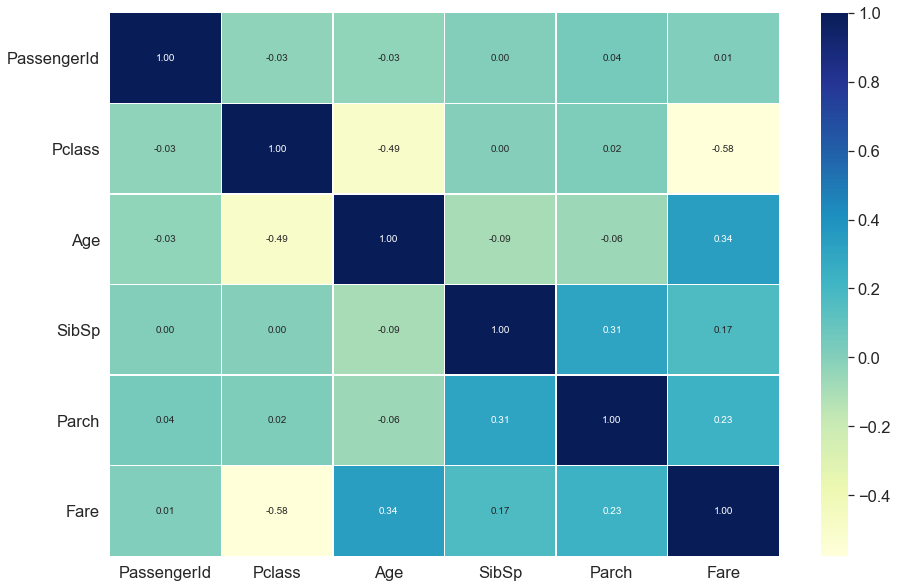

In [1038]:
corr_matrix = df_test.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, 
            annot=True, 
            linewidths=0.5, 
            fmt= ".2f", 
            cmap="YlGnBu");

# Feature Engineering

Now that we've explored the data and drawn some conclusions on the correlation of variables with the target variables, we can start to resolve the two main issues posed in the beginning of the notebook:

1. Missing values
2. Categorical values need to be converted to numeric data

**NOTE:** During this process, we will deal with the train and test set separately but feature engineer them identically. Treating them separately ensures that the test set data isn't influencing the train set. 

## 1. Missing Values

In [1039]:
df_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [1040]:
df_test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

**Missing Values:**
    
Train Set: `Age`, `Cabin`, `Embarked`

Test Set: `Age`, `Cabin`, `Fare`

## Test Set: Fare

In [1041]:
df_test[df_test["Fare"].isna()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


Based on the correlation heatmap, Fare is largely correlated with Parch and Age. Since Age is a continuous variable, we will look at the next most correlated variable, Sibsp. So we will take a look at passengers with the same Parch and SibSp in order to fill this values

In [1042]:
median = df_test.groupby(["Parch", "SibSp"]).Fare.median()[0][0]
df_test["Fare"] = df_test["Fare"].fillna(median)

## Train Set: Embarked

In [1043]:
df_train[df_train["Embarked"].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


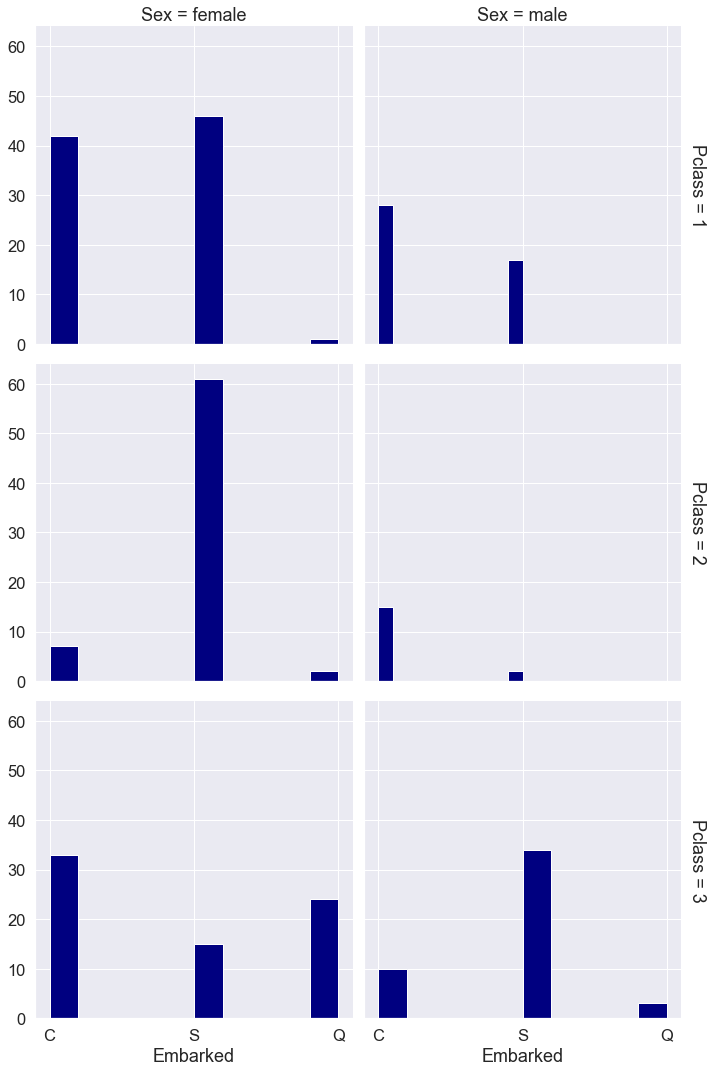

In [1044]:
pal = {0: 'gray', 1: 'navy'}
grid = sns.FacetGrid(df_train[df_train.Survived==1], 
                     height=5, row="Pclass", col="Sex", margin_titles=True, palette=pal, hue="Survived")
grid.map(plt.hist, "Embarked")

Based on our EDA, we can see that of Pclass=1, most passengers embarked from S or C. Given that the passengers are female, of Pclass=1, and survived, the above visual shows that most passengers that match this criteria come from embarked S. So we can assume the same and impute values accordingly.

In [1045]:
df_train["Embarked"] = df_train["Embarked"].fillna("S")

In [1046]:
df_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

## Train and Test: Age and Cabin

At this point, we will split the data into a train and validation set to ensure that the Age imputation (done by using the mean), isn't influenced by unseen data. 

**NOTE:** The approach we used here was a stand-out validation set. However, it would be interesting to compare these results with a cross-validation strategy instead and see if we are able to get higher accuracy (and decreases any chances of overfitting). 

In [1086]:
# Split into X and y
x = df_train.drop("Survived", axis=1)
y = df_train["Survived"]

# Split data into train and test
np.random.seed(42)
x_train, x_val, y_train, y_val = train_test_split(x,
                                                    y,
                                                    test_size=0.2)

In [1087]:
x_train["Cabin"].fillna("missing", inplace=True)
x_val["Cabin"].fillna("missing", inplace=True)

# Do the same for the final test set
df_test["Cabin"].fillna("missing", inplace=True)

/Users/harjotsidhu/Documents/MLPractice/Titanic/env/lib/python3.8/site-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [1312]:
x_train["Age"].fillna(x_train["Age"].mean(), inplace=True)
x_val["Age"].fillna(x_val["Age"].mean(), inplace=True)

# Do the same for the final test set
df_test["Age"].fillna(df_test["Age"].mean(), inplace=True)

## 2. Categorical Values to Numeric

In [1090]:
x_train_2 = pd.get_dummies(x_train, prefix_sep='_', drop_first=True)
x_val_2 = pd.get_dummies(x_val, prefix_sep='_', drop_first=True)
df_test_2 = pd.get_dummies(df_test, prefix_sep='_', drop_first=True)

In [1091]:
final_x_train, final_x_val = x_train_2.align(x_val_2, join='left', axis=1, fill_value=0)
final_x_train, final_df_test = x_train_2.align(df_test_2, join='left', axis=1, fill_value=0)

In [1092]:
final_x_val.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,"Name_Abbott, Mrs. Stanton (Rosa Hunt)","Name_Abelson, Mr. Samuel","Name_Abelson, Mrs. Samuel (Hannah Wizosky)","Name_Adahl, Mr. Mauritz Nils Martin",...,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Cabin_missing,Embarked_Q,Embarked_S
709,710,3,30.27259,1,1,15.2458,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
439,440,2,31.00000,0,0,10.5000,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
840,841,3,20.00000,0,0,7.9250,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
720,721,2,6.00000,0,1,33.0000,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
39,40,3,14.00000,1,0,11.2417,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


# Building a Model

In [1095]:
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Instantiate and fit the model (on the training set)
clf = RandomForestClassifier()
clf.fit(final_x_train, y_train)

# Check the score of the model (on the test set)
clf.score(final_x_val, y_val)

0.8100558659217877

In [1096]:
print(f"Titantic Survival Classifier Accuracy: {clf.score(final_x_val, y_val) * 100:.2f}%")

Titantic Survival Classifier Accuracy: 81.01%


# Evaluating Model

In [934]:
from sklearn.metrics import roc_curve

# Make predictions with probabilities
y_probs = clf.predict_proba(final_x_val)

# Keep the probabilites of the positive class only
y_probs = y_probs[:, 1]

# Calculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_val, y_probs)

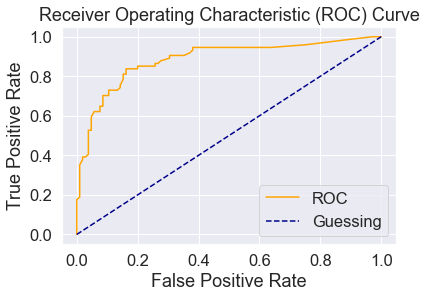

In [935]:
def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positve rate (fpr) and 
    true postive rate (tpr) of a classifier.
    """
    # Plot ROC curve
    plt.plot(fpr, tpr, color='orange', label='ROC')
    # Plot line with no predictive power (baseline)
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--', label='Guessing')
    # Customize the plot
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr, tpr)

In [936]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_val, y_probs)

0.8849420849420849

In [938]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(final_x_val)

confusion_matrix(y_val, y_preds)

pd.crosstab(y_val, 
            y_preds, 
            rownames=["Actual Label"], 
            colnames=["Predicted Label"])

Predicted Label,0,1
Actual Label,,
0,96,9
1,26,48


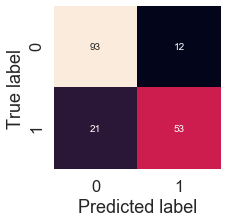

In [939]:
# Plot a confusion matrix with Seaborn
import seaborn as sns

def plot_conf_mat(conf_mat):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(conf_mat,
                     annot=True, # Annotate the boxes 
                     cbar=False)
    plt.xlabel('Predicted label')
    plt.ylabel('True label');

plot_conf_mat(conf_mat)

In [940]:
from sklearn.metrics import classification_report

print(classification_report(y_val, y_preds))

              precision    recall  f1-score   support

           0       0.79      0.91      0.85       105
           1       0.84      0.65      0.73        74

    accuracy                           0.80       179
   macro avg       0.81      0.78      0.79       179
weighted avg       0.81      0.80      0.80       179



# Improving Model

We will first focus on hyperparameter tuning, but a worthwhile exploration is also in the dataset and if there are more effective ways to fill missing values or interpret data (specifically the Cabin and Ticket values). 

### RandomizedSearchCV

We will first use RandomizedSearch to begin to pinpoint parameters that work the best, and then will use GirdSearch for an exhaustive search

In [941]:
# Hyperparameter grid RandomizedSearchCV will search over
grid = {"n_estimators": [10, 100, 200, 500, 1000, 1200],
        "max_depth": [None, 5, 10, 20, 30],
        "max_features": ["auto", "sqrt"],
        "min_samples_split": [2, 4, 6],
        "min_samples_leaf": [1, 2, 4]}

In [942]:
from sklearn.model_selection import RandomizedSearchCV

np.random.seed(42)

clf = RandomForestClassifier(n_jobs=1)

# Setup RandomizedSearchCV
rs_clf = RandomizedSearchCV(estimator=clf,
                            param_distributions=grid,
                            n_iter=20, # try 20 models total
                            cv=5, # 5-fold cross-validation
                            verbose=2) # print out results

# Fit the RandomizedSearchCV version of clf
rs_clf.fit(final_x_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] n_estimators=100, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=100, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=10, total=   0.2s
[CV] n_estimators=100, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=10 
[CV]  n_estimators=100, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=10, total=   0.2s
[CV] n_estimators=100, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  n_estimators=100, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=10, total=   0.2s
[CV] n_estimators=100, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=10 
[CV]  n_estimators=100, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=10, total=   0.2s
[CV] n_estimators=100, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=10 
[CV]  n_estimators=100, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=10, total=   0.2s
[CV] n_estimators=100, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=None 
[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=None, total=   0.1s
[CV] n_estimators=100, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=None 
[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=None, total=   0.1s
[CV] n_estimators=100, min_samples_split=2, 

[CV]  n_estimators=1200, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=20, total=   2.6s
[CV] n_estimators=1200, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=20 
[CV]  n_estimators=1200, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=20, total=   2.6s
[CV] n_estimators=1200, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=20 
[CV]  n_estimators=1200, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=20, total=   2.5s
[CV] n_estimators=1200, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=20 
[CV]  n_estimators=1200, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=20, total=   2.7s
[CV] n_estimators=1200, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=20 
[CV]  n_estimators=1200, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=20, total=   2.7s
[CV] n_estimators=10, min_samples_split=4, 

[CV]  n_estimators=1200, min_samples_split=4, min_samples_leaf=4, max_features=sqrt, max_depth=None, total=   2.8s
[CV] n_estimators=1200, min_samples_split=4, min_samples_leaf=4, max_features=sqrt, max_depth=None 
[CV]  n_estimators=1200, min_samples_split=4, min_samples_leaf=4, max_features=sqrt, max_depth=None, total=   1.6s
[CV] n_estimators=1200, min_samples_split=4, min_samples_leaf=4, max_features=sqrt, max_depth=None 
[CV]  n_estimators=1200, min_samples_split=4, min_samples_leaf=4, max_features=sqrt, max_depth=None, total=   1.6s
[CV] n_estimators=1200, min_samples_split=4, min_samples_leaf=4, max_features=sqrt, max_depth=None 
[CV]  n_estimators=1200, min_samples_split=4, min_samples_leaf=4, max_features=sqrt, max_depth=None, total=   1.5s
[CV] n_estimators=1200, min_samples_split=4, min_samples_leaf=4, max_features=sqrt, max_depth=None 
[CV]  n_estimators=1200, min_samples_split=4, min_samples_leaf=4, max_features=sqrt, max_depth=None, total=   1.5s
[CV] n_estimators=1000, m

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.3min finished


In [943]:
rs_clf.best_params_

{'n_estimators': 100,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': None}

In [948]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score


def evaluate_preds(y_true, y_preds):
    """
    Performs evaluation comparison on y_true labels vs. y_pred labels.
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {"accuracy": round(accuracy, 2),
                   "precision": round(precision, 2), 
                   "recall": round(recall, 2),
                   "f1": round(f1, 2)}
    print(f"Acc: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {f1:.2f}")

    return metric_dict

In [949]:
# Make predictions with the best hyperparameters
rs_y_preds = rs_clf.predict(final_x_val)

# Evaluate the predictions
rs_metrics = evaluate_preds(y_val, rs_y_preds)

Acc: 82.12%
Precision: 0.86
Recall: 0.68
F1 score: 0.76


### GridSearchCV

In [950]:
grid

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [951]:
rs_clf.best_params_

{'n_estimators': 100,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': None}

In [952]:
grid_2 = {'n_estimators': [1200, 1500, 2000],
          'max_depth': [None, 5, 10],
          'max_features': ['auto', 'sqrt'],
          'min_samples_split': [4, 6],
          'min_samples_leaf': [1, 2]}

In [953]:
from sklearn.model_selection import GridSearchCV


np.random.seed(42)

# Setup GridSearchCV
gs_clf = GridSearchCV(estimator=clf,
                      param_grid=grid_2,
                      cv=5, # 5-fold cross-validation
                      verbose=2) # print out progress

# Fit the RandomizedSearchCV version of clf
gs_clf.fit(final_x_train, y_train);

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200, total=   3.5s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.5s remaining:    0.0s


[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200, total=   3.6s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200, total=   3.5s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200, total=   3.4s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200, total=   3.4s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1500 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1500, total=   4.3s
[CV] max_depth=None, max_

[CV]  max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=2000, total=   2.4s
[CV] max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=2000 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=2000, total=   2.4s
[CV] max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=2000 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=2000, total=   2.4s
[CV] max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=2000 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=2000, total=   2.4s
[CV] max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=2000 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=2000, total=   2.5s
[CV] max_depth=None, max_

[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1200, total=   3.3s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1500, total=   4.1s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1500, total=   4.1s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1500, total=   4.2s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1500, total=   4.3s
[CV] max_depth=None, max_

[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=2000, total=   2.4s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=2000 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=2000, total=   2.4s
[CV] max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200, total=   1.5s
[CV] max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200, total=   1.5s
[CV] max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200, total=   1.5s
[CV] max_depth=5, max_features=auto, min_sa

[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1500, total=   1.9s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1500 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1500, total=   2.0s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=2000 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=2000, total=   2.4s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=2000 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=2000, total=   2.4s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=2000 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=2000, total=   2.4s
[CV] max_depth=5, max_features=auto, min_samples_lea

[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1200, total=   1.5s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1200 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1200, total=   1.6s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1500 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1500, total=   1.9s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1500 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1500, total=   1.9s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1500 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1500, total=   1.9s
[CV] max_depth=5, max_features=sqrt, min_samples_lea

[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=2000, total=   2.4s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=2000 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=2000, total=   2.4s
[CV] max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200, total=   2.0s
[CV] max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200, total=   1.9s
[CV] max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200, total=   1.9s
[CV] max_depth=10, max_features=auto, min_samp

[CV]  max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1500, total=   1.8s
[CV] max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1500 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1500, total=   1.9s
[CV] max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1500 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1500, total=   1.9s
[CV] max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=2000 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=2000, total=   2.5s
[CV] max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=2000 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=2000, total=   2.5s
[CV] max_depth=10, max_features=auto, min_s

[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1200, total=   1.8s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1200 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1200, total=   1.8s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1200 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1200, total=   1.9s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1200 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1200, total=   1.8s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1500 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1500, total=   2.3s
[CV] max_depth=10, max_features=sqrt, min_s

[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=2000, total=   2.4s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=2000 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=2000, total=   2.4s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=2000 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=2000, total=   2.4s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=2000 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=2000, total=   2.4s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=2000 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=2000, total=   2.8s


[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed: 14.7min finished


In [954]:
gs_clf.best_params_


{'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 1200}

In [955]:
# Max predictions with the GridSearchCV classifier
gs_y_preds = gs_clf.predict(final_x_val)

# Evaluate the predictions
gs_metrics = evaluate_preds(y_val, gs_y_preds)

Acc: 82.68%
Precision: 0.85
Recall: 0.70
F1 score: 0.77


In [957]:
len(gs_y_preds)

179

In [958]:
# Max predictions with the GridSearchCV classifier
gs_y_preds_final = gs_clf.predict(final_df_test)

In [959]:
len(gs_y_preds_final)

418

In [960]:
gs_y_preds_final

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [994]:
passengerIDs = pd.DataFrame(final_df_test["PassengerId"])


preds_final = pd.DataFrame(gs_y_preds_final)

In [995]:
cols = [passengerIDs, preds_final]
final_submission = pd.concat(cols, axis=1)

In [996]:
final_submission.rename(columns = {0:"Survived"}, inplace = True)

In [999]:
final_submission.to_csv("final_submission.csv", index=False)

# Making Improvements (Revisiting)

With the above model, I achieved a score of about 76%. We can go back and try achieving a better school by taking a look at our feature engineering and see if there is a better way to organize our data. 

For instance, let's take a look at the following variables again, in an effort to reduce the number of unique variables:

`Name` - perhaps we can extract something more useful from this column, such as title?

`Ticket` - maybe we can summarize these into ticket classes

`Cabin` - similar idea as Ticket, summarizing into ticket classes

## `Name` 

For clarity, let's start with copies our original data. 

In [1335]:
df_train_d2 = pd.read_csv("train.csv")
df_test_d2 = pd.read_csv("test.csv")
df_train.shape, df_test.shape

((891, 12), (418, 11))

In [1336]:
df_train_d2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [1337]:
def titles(df):

    df["Title"] = df["Name"].map(lambda x:x.split(',')[1].split('.')[0].strip())
    df.drop(["Name"],axis=1,inplace=True)
    return df

In [1338]:
df_train_d2 = titles(df_train_d2)
df_test_d2 = titles(df_test_d2)

In [1339]:
df_train_d2["Title"].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [1340]:
df_test_d2["Title"].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Ms', 'Col', 'Rev', 'Dr', 'Dona'],
      dtype=object)

Text(0.5, 1.0, 'Survival Rate based on Title')

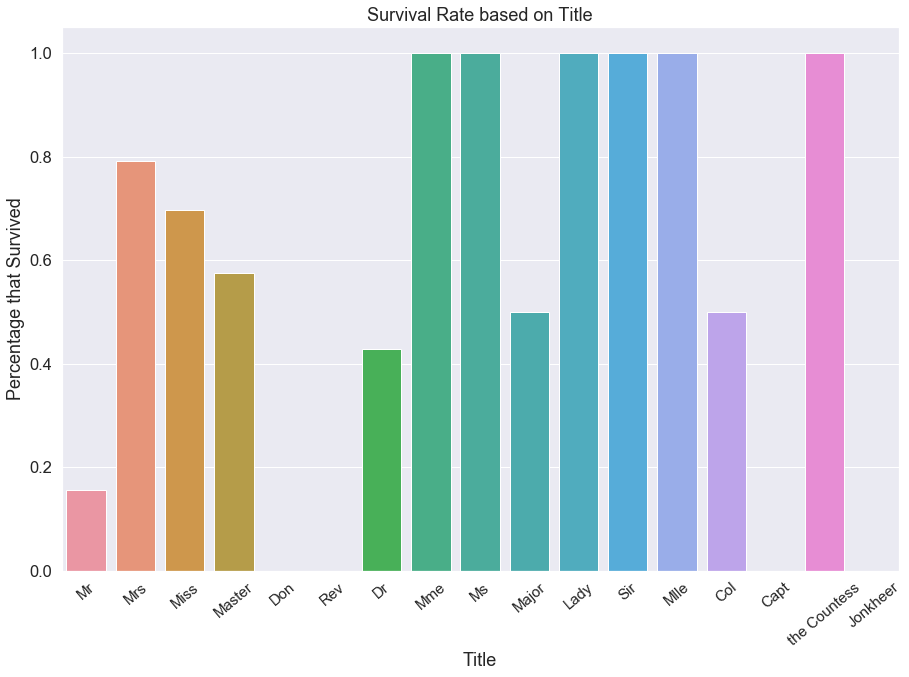

In [1341]:
fig, ax = plt.subplots(figsize=(15,10))

sns.barplot(data=df_train_d2, x="Title", y="Survived", estimator=np.mean, ax=ax, ci=None)
ax.set_ylabel("Percentage that Survived")
ax.set_xlabel("Title")
ax.set_xticklabels(ax.get_xticklabels(), rotation = 40, fontsize=15)
ax.set_title("Survival Rate based on Title")

**OBSERVATION:** An interesting note here is that Titles with higher class, such as Lady, Sir, etc, have a significantly higher survival rate. Perhaps including an encoded version of the Titles column will help our predictive modeling. 

## `Ticket`

**NOTE:** There seems to be far too many unique ticket numbers. Perhaps a correlation isn't significant here. Let's move onto Cabin for now, and see how our model performs then. We can drop it for now. 

In [1342]:
df_train_d2 = df_train_d2.drop("Ticket", axis=1)
df_test_d2 = df_test_d2.drop("Ticket", axis=1)

## `Cabin`

In [1343]:
df_test_d2["Cabin"].unique()

array([nan, 'B45', 'E31', 'B57 B59 B63 B66', 'B36', 'A21', 'C78', 'D34',
       'D19', 'A9', 'D15', 'C31', 'C23 C25 C27', 'F G63', 'B61', 'C53',
       'D43', 'C130', 'C132', 'C101', 'C55 C57', 'B71', 'C46', 'C116',
       'F', 'A29', 'G6', 'C6', 'C28', 'C51', 'E46', 'C54', 'C97', 'D22',
       'B10', 'F4', 'E45', 'E52', 'D30', 'B58 B60', 'E34', 'C62 C64',
       'A11', 'B11', 'C80', 'F33', 'C85', 'D37', 'C86', 'D21', 'C89',
       'F E46', 'A34', 'D', 'B26', 'C22 C26', 'B69', 'C32', 'B78',
       'F E57', 'F2', 'A18', 'C106', 'B51 B53 B55', 'D10 D12', 'E60',
       'E50', 'E39 E41', 'B52 B54 B56', 'C39', 'B24', 'D28', 'B41', 'C7',
       'D40', 'D38', 'C105'], dtype=object)

We can see right away that the cabin is prefixed with a letter, which refers to the deck. Let's separate these and see if there is some correlation between deck and survival. 

In [1345]:
def deck(df):

    deck = {"A": "A", "B": "B", "C": "C", "D": "D", "E": "E", "F": "F", "G": "G", "U": "U"}

    # fill na values with arbitrary letter
    df['Cabin'] = df['Cabin'].fillna("U0")
    df['Deck'] = df['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())

    df['Deck'] = df['Deck'].map(deck)
    df['Deck'] = df['Deck'].fillna(0)
    df.drop(["Cabin"],axis=1,inplace=True)

    
    return df

In [1346]:
deck(df_train_d2)
deck(df_test_d2)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Deck
0,892,3,male,34.5,0,0,7.8292,Q,Mr,U
1,893,3,female,47.0,1,0,7.0000,S,Mrs,U
2,894,2,male,62.0,0,0,9.6875,Q,Mr,U
3,895,3,male,27.0,0,0,8.6625,S,Mr,U
4,896,3,female,22.0,1,1,12.2875,S,Mrs,U
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,male,NaN,0,0,8.0500,S,Mr,U
414,1306,1,female,39.0,0,0,108.9000,C,Dona,C
415,1307,3,male,38.5,0,0,7.2500,S,Mr,U
416,1308,3,male,NaN,0,0,8.0500,S,Mr,U


In [1347]:
df_test_d2.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Deck
0,892,3,male,34.5,0,0,7.8292,Q,Mr,U
1,893,3,female,47.0,1,0,7.0000,S,Mrs,U
2,894,2,male,62.0,0,0,9.6875,Q,Mr,U
3,895,3,male,27.0,0,0,8.6625,S,Mr,U
4,896,3,female,22.0,1,1,12.2875,S,Mrs,U


In [1348]:
df_train_d2.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
Title            0
Deck             0
dtype: int64

In [1349]:
df_test_d2.isna().sum()

PassengerId     0
Pclass          0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
Title           0
Deck            0
dtype: int64

# Impute Missing Values

## Train Set: Embarked

In [1350]:
df_train_d2["Embarked"] = df_train_d2["Embarked"].fillna("S")

## Test Set: Fare

In [1351]:
median = df_test_d2.groupby(["Parch", "SibSp"]).Fare.median()[0][0]
df_test_d2["Fare"] = df_test_d2["Fare"].fillna(median)

## Train and Test Set: Age

Now we will split the data before imputation. 

In [1352]:
# Split into X and y
x_d2 = df_train_d2.drop("Survived", axis=1)
y_d2 = df_train_d2["Survived"]

# Split data into train and test
np.random.seed(42)
x_train_d2, x_val_d2, y_train_d2, y_val_d2 = train_test_split(x_d2,
                                                    y_d2,
                                                    test_size=0.2)

In [1353]:
x_train_d2["Age"].fillna(x_train_d2["Age"].mean(), inplace=True)
x_val_d2["Age"].fillna(x_val_d2["Age"].mean(), inplace=True)

# Do the same for the final test set
df_test_d2["Age"].fillna(df_test_d2["Age"].mean(), inplace=True)

/Users/harjotsidhu/Documents/MLPractice/Titanic/env/lib/python3.8/site-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


# Convert Categorical to Numeric

In [1354]:
x_train_cat2 = pd.get_dummies(x_train_d2, prefix_sep='_', drop_first=True)
x_val_cat2 = pd.get_dummies(x_val_d2, prefix_sep='_', drop_first=True)
df_test_cat2 = pd.get_dummies(df_test_d2, prefix_sep='_', drop_first=True)

In [1362]:
final_x_train_d2, final_x_val_d2 = x_train_cat2.align(x_val_cat2, join='left', axis=1, fill_value=0)
final_x_train_d2, final_df_test_d2 = x_train_cat2.align(df_test_cat2, join='left', axis=1, fill_value=0)

# Building a Model

In [1364]:
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(40)

# Instantiate and fit the model (on the training set)
clf_2 = RandomForestClassifier()
clf_2.fit(final_x_train_d2, y_train_d2)

# Check the score of the model (on the test set)
clf_2.score(final_x_val_d2, y_val_d2)

0.8324022346368715

# Evaluation

In [1365]:
from sklearn.metrics import roc_curve

# Make predictions with probabilities
y_probs = clf_2.predict_proba(final_x_val_d2)

# Keep the probabilites of the positive class only
y_probs = y_probs[:, 1]

# Calculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_val_d2, y_probs)

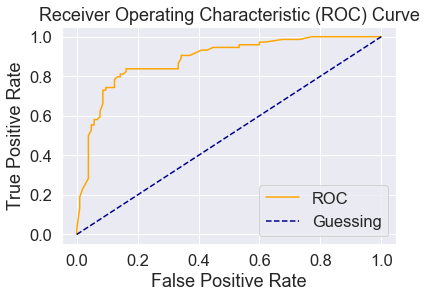

In [1366]:
def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positve rate (fpr) and 
    true postive rate (tpr) of a classifier.
    """
    # Plot ROC curve
    plt.plot(fpr, tpr, color='orange', label='ROC')
    # Plot line with no predictive power (baseline)
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--', label='Guessing')
    # Customize the plot
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr, tpr)

In [1391]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(final_x_val_d2)

confusion_matrix(y_val_d2, y_preds)

pd.crosstab(y_val_d2, 
            y_preds, 
            rownames=["Actual Label"], 
            colnames=["Predicted Label"])

Predicted Label,0,1
Actual Label,,
0,92,13
1,17,57


# Improving Model

## RandomizedSearch CV

In [1395]:
# Hyperparameter grid RandomizedSearchCV will search over
grid = {"n_estimators": [10, 100, 200, 500, 1000, 1200, 1500],
        "criterion": ['gini', 'entropy'],
        "max_depth": [None, 5, 10, 20, 30],
        "max_features": ["auto", "sqrt", "log2"],
        "min_samples_split": [2, 4, 6],
        "min_samples_leaf": [1, 2, 4]}

In [1396]:
from sklearn.model_selection import RandomizedSearchCV

np.random.seed(42)

clf_2 = RandomForestClassifier(n_jobs=1)

# Setup RandomizedSearchCV
rs_clf_2 = RandomizedSearchCV(estimator=clf_2,
                            param_distributions=grid,
                            n_iter=20, # try 20 models total
                            cv=5, # 5-fold cross-validation
                            verbose=2) # print out results

# Fit the RandomizedSearchCV version of clf
rs_clf_2.fit(final_x_train_d2, y_train_d2);

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] n_estimators=500, min_samples_split=4, min_samples_leaf=4, max_features=sqrt, max_depth=5, criterion=entropy 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=500, min_samples_split=4, min_samples_leaf=4, max_features=sqrt, max_depth=5, criterion=entropy, total=   0.7s
[CV] n_estimators=500, min_samples_split=4, min_samples_leaf=4, max_features=sqrt, max_depth=5, criterion=entropy 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


[CV]  n_estimators=500, min_samples_split=4, min_samples_leaf=4, max_features=sqrt, max_depth=5, criterion=entropy, total=   0.6s
[CV] n_estimators=500, min_samples_split=4, min_samples_leaf=4, max_features=sqrt, max_depth=5, criterion=entropy 
[CV]  n_estimators=500, min_samples_split=4, min_samples_leaf=4, max_features=sqrt, max_depth=5, criterion=entropy, total=   0.7s
[CV] n_estimators=500, min_samples_split=4, min_samples_leaf=4, max_features=sqrt, max_depth=5, criterion=entropy 
[CV]  n_estimators=500, min_samples_split=4, min_samples_leaf=4, max_features=sqrt, max_depth=5, criterion=entropy, total=   0.6s
[CV] n_estimators=500, min_samples_split=4, min_samples_leaf=4, max_features=sqrt, max_depth=5, criterion=entropy 
[CV]  n_estimators=500, min_samples_split=4, min_samples_leaf=4, max_features=sqrt, max_depth=5, criterion=entropy, total=   0.7s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=None, criterion=entropy 
[CV]  n_estimato

[CV]  n_estimators=1500, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=30, criterion=entropy, total=   1.9s
[CV] n_estimators=1500, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=30, criterion=entropy 
[CV]  n_estimators=1500, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=30, criterion=entropy, total=   1.9s
[CV] n_estimators=1500, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=30, criterion=entropy 
[CV]  n_estimators=1500, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=30, criterion=entropy, total=   1.9s
[CV] n_estimators=1500, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=30, criterion=entropy 
[CV]  n_estimators=1500, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=30, criterion=entropy, total=   2.0s
[CV] n_estimators=1500, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=30, criterion=entropy 
[CV]

[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=20, criterion=gini, total=   0.3s
[CV] n_estimators=1000, min_samples_split=6, min_samples_leaf=4, max_features=sqrt, max_depth=30, criterion=entropy 
[CV]  n_estimators=1000, min_samples_split=6, min_samples_leaf=4, max_features=sqrt, max_depth=30, criterion=entropy, total=   1.3s
[CV] n_estimators=1000, min_samples_split=6, min_samples_leaf=4, max_features=sqrt, max_depth=30, criterion=entropy 
[CV]  n_estimators=1000, min_samples_split=6, min_samples_leaf=4, max_features=sqrt, max_depth=30, criterion=entropy, total=   1.3s
[CV] n_estimators=1000, min_samples_split=6, min_samples_leaf=4, max_features=sqrt, max_depth=30, criterion=entropy 
[CV]  n_estimators=1000, min_samples_split=6, min_samples_leaf=4, max_features=sqrt, max_depth=30, criterion=entropy, total=   1.3s
[CV] n_estimators=1000, min_samples_split=6, min_samples_leaf=4, max_features=sqrt, max_depth=30, criterion=entropy 
[CV]  n_

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.5min finished


In [1397]:
rs_clf_2.best_params_

{'n_estimators': 200,
 'min_samples_split': 4,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20,
 'criterion': 'gini'}

## GridSearchCV

In [1398]:
grid_d2 = {'n_estimators': [1200, 1500, 2000],
          'max_depth': [None, 5],
          'criterion': ["gini"],
          'max_features': ['auto', 'sqrt'],
          'min_samples_split': [4, 6],
          'min_samples_leaf': [1, 2]}

In [1399]:
from sklearn.model_selection import GridSearchCV


np.random.seed(42)

# Setup GridSearchCV
gs_clf = GridSearchCV(estimator=clf_2,
                      param_grid=grid_d2,
                      cv=5, # 5-fold cross-validation
                      verbose=2) # print out progress

# Fit the RandomizedSearchCV version of clf
gs_clf.fit(final_x_train_d2, y_train_d2);

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200, total=   1.7s
[CV] criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s remaining:    0.0s


[CV]  criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200, total=   1.6s
[CV] criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200 
[CV]  criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200, total=   1.6s
[CV] criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200 
[CV]  criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200, total=   1.6s
[CV] criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200 
[CV]  criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200, total=   1.7s
[CV] criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1500 
[CV]  criter

[CV]  criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1500, total=   1.9s
[CV] criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1500 
[CV]  criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1500, total=   1.9s
[CV] criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1500 
[CV]  criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1500, total=   2.0s
[CV] criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1500 
[CV]  criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1500, total=   1.9s
[CV] criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1500 
[CV]  criter

[CV]  criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=1500, total=   2.0s
[CV] criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=2000 
[CV]  criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=2000, total=   2.7s
[CV] criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=2000 
[CV]  criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=2000, total=   2.7s
[CV] criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=2000 
[CV]  criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=2000, total=   2.7s
[CV] criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=2000 
[CV]  criter

[CV]  criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=2000, total=   2.6s
[CV] criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=2000 
[CV]  criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=2000, total=   2.6s
[CV] criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200 
[CV]  criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200, total=   1.5s
[CV] criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200 
[CV]  criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200, total=   1.5s
[CV] criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200 
[CV]  criter

[CV]  criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=1200, total=   1.4s
[CV] criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=1200 
[CV]  criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=1200, total=   1.4s
[CV] criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=1200 
[CV]  criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=1200, total=   1.4s
[CV] criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=1500 
[CV]  criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=1500, total=   1.8s
[CV] criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=1500 
[CV]  criterion=gini, max_depth=5, m

[CV]  criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=1500, total=   1.8s
[CV] criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=1500 
[CV]  criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=1500, total=   1.8s
[CV] criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=1500 
[CV]  criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=1500, total=   1.8s
[CV] criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=1500 
[CV]  criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=1500, total=   1.8s
[CV] criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=2000 
[CV]  criterion=gini, max_depth=5, m

[CV]  criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=2000, total=   2.4s
[CV] criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=2000 
[CV]  criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=2000, total=   2.4s
[CV] criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=2000 
[CV]  criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=2000, total=   2.4s
[CV] criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=2000 
[CV]  criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=2000, total=   2.4s
[CV] criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=2000 
[CV]  criterion=gini, max_depth=5, m

[CV]  criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=2000, total=   2.4s


[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:  7.9min finished


In [1400]:
gs_clf.best_params_

{'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 2000}

In [1401]:
# Max predictions with the GridSearchCV classifier
gs_y_preds = gs_clf.predict(final_x_val_d2)

# Evaluate the predictions
gs_metrics = evaluate_preds(y_val_d2, gs_y_preds)

Acc: 83.80%
Precision: 0.82
Recall: 0.78
F1 score: 0.80


As we can see above, using a more rigorous feature engineering method, we have been able to increase our accuracy to nearly 84%. We can now prepare out model for submission to Kaggle.

In [1402]:
# Make predictions 
gs_y_preds_final_2 = gs_clf.predict(final_df_test_d2)

In [1404]:
# Create a dataframe

passengerIDs_2 = pd.DataFrame(final_df_test_d2["PassengerId"])

preds_final_2 = pd.DataFrame(gs_y_preds_final_2)

In [1405]:
cols_2 = [passengerIDs_2, preds_final_2]
final_submission_2 = pd.concat(cols, axis=1)

In [1406]:
final_submission_2.rename(columns = {0:"Survived"}, inplace = True)

In [1407]:
final_submission_2.to_csv("final_submission_2.csv", index=False)